## EDA

In [19]:
# Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Read the csv 
path=os.getcwd()
parent_path = os.path.dirname(path)
df = pd.read_csv(parent_path+'\\data\\train.csv', index_col="id")


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1235 non-null   object 
 7   peripheral_pulse       1235 non-null   object 
 8   mucous_membrane        1235 non-null   object 
 9   capillary_refill_time  1235 non-null   object 
 10  pain                   1235 non-null   object 
 11  peristalsis            1235 non-null   object 
 12  abdominal_distention   1235 non-null   object 
 13  nasogastric_tube       1235 non-null   object 
 14  nasogastric_reflux     1235 non-null   object 
 15  naso

In [22]:
df.isna().sum()*100/len(df)

surgery                  0.0
age                      0.0
hospital_number          0.0
rectal_temp              0.0
pulse                    0.0
respiratory_rate         0.0
temp_of_extremities      0.0
peripheral_pulse         0.0
mucous_membrane          0.0
capillary_refill_time    0.0
pain                     0.0
peristalsis              0.0
abdominal_distention     0.0
nasogastric_tube         0.0
nasogastric_reflux       0.0
nasogastric_reflux_ph    0.0
rectal_exam_feces        0.0
abdomen                  0.0
packed_cell_volume       0.0
total_protein            0.0
abdomo_appearance        0.0
abdomo_protein           0.0
surgical_lesion          0.0
lesion_1                 0.0
lesion_2                 0.0
lesion_3                 0.0
cp_data                  0.0
outcome                  0.0
dtype: float64

There is not any null.

In [24]:
pd.set_option('display.max_columns', None)
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,None,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


### Numeric data

In [25]:
df2 = df._get_numeric_data()

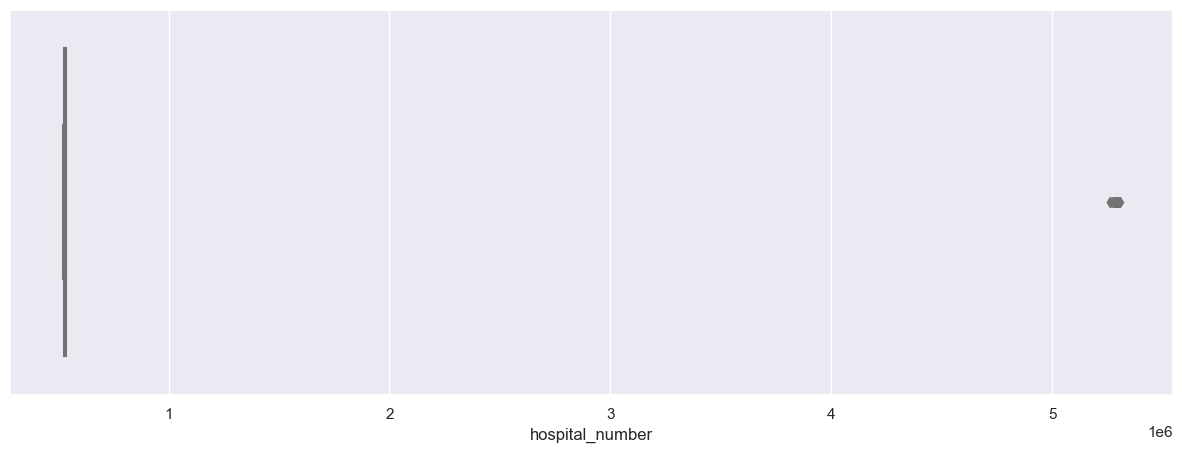

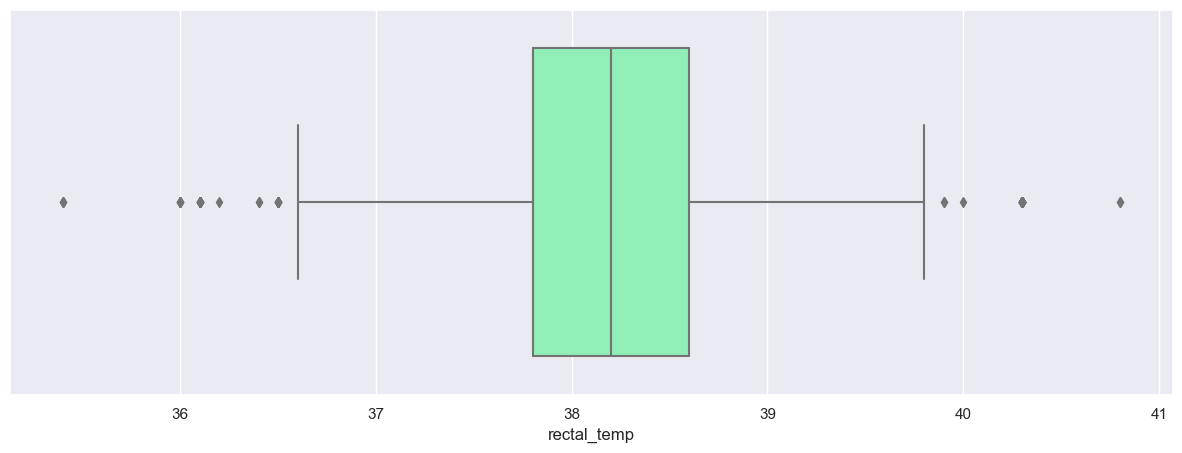

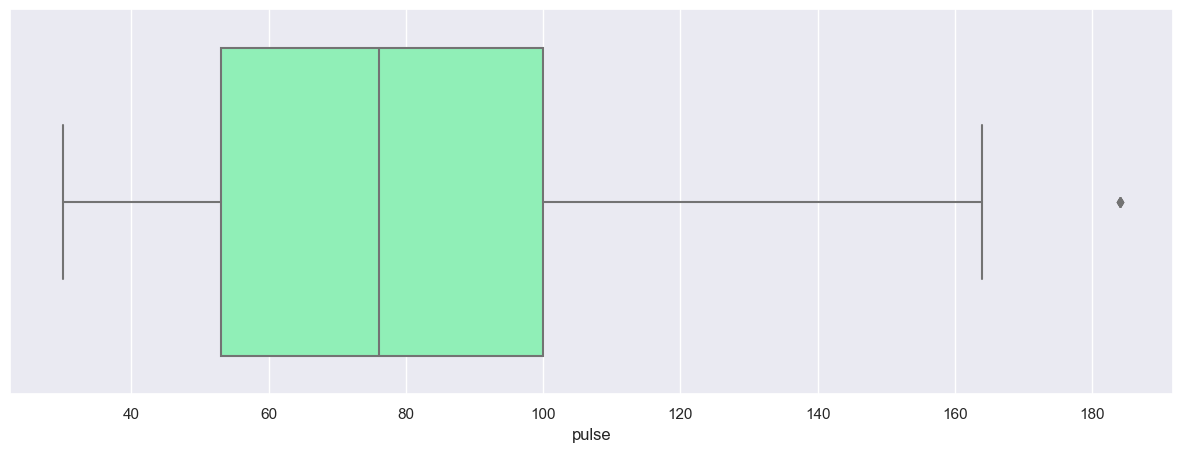

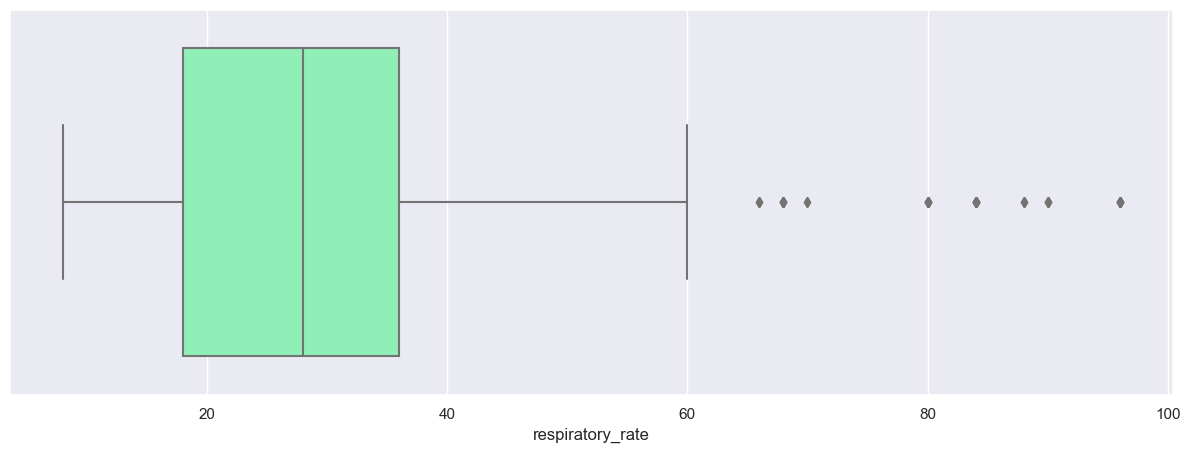

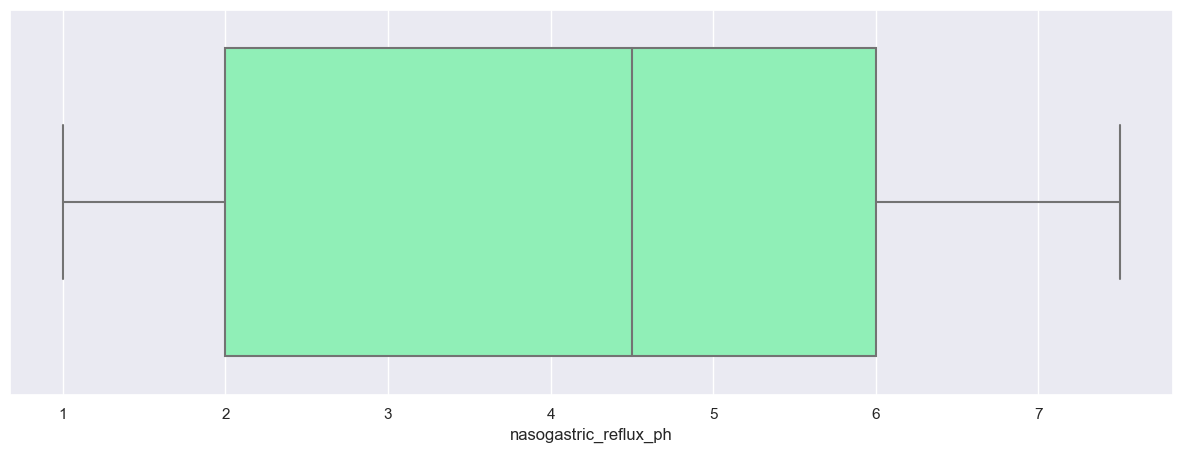

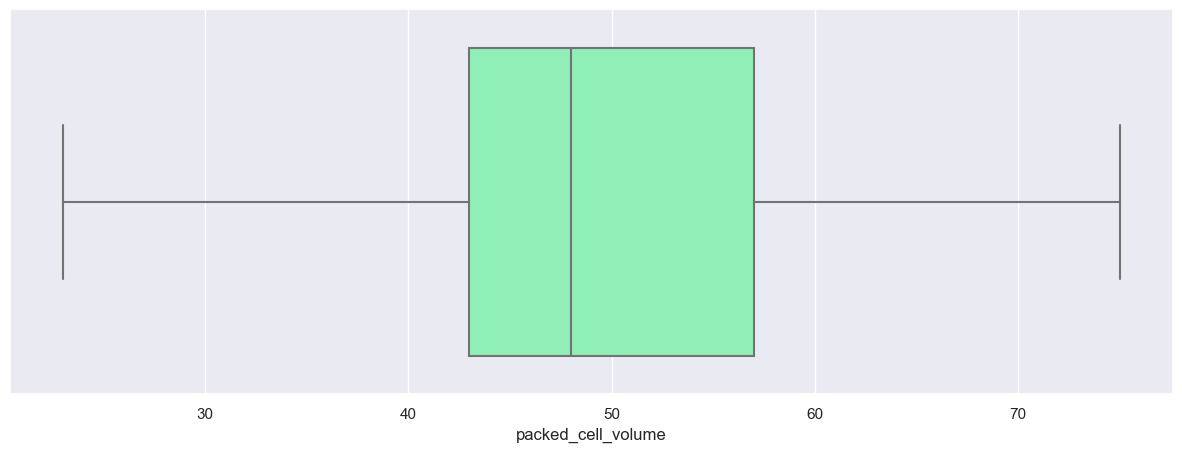

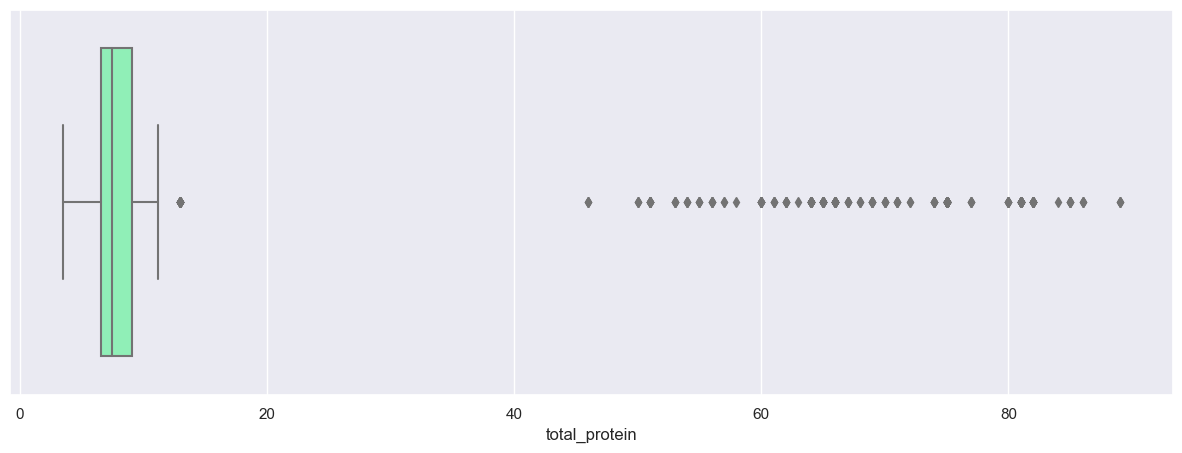

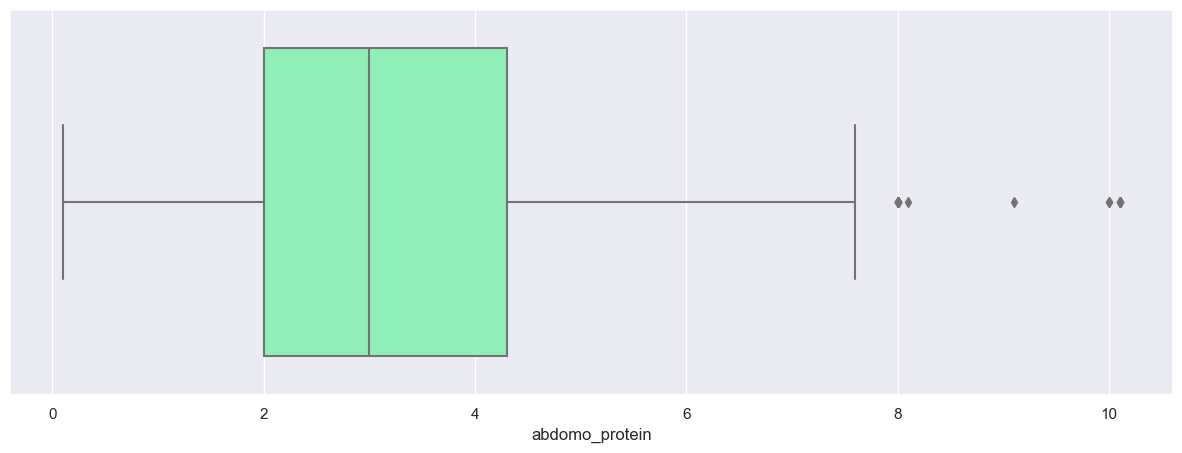

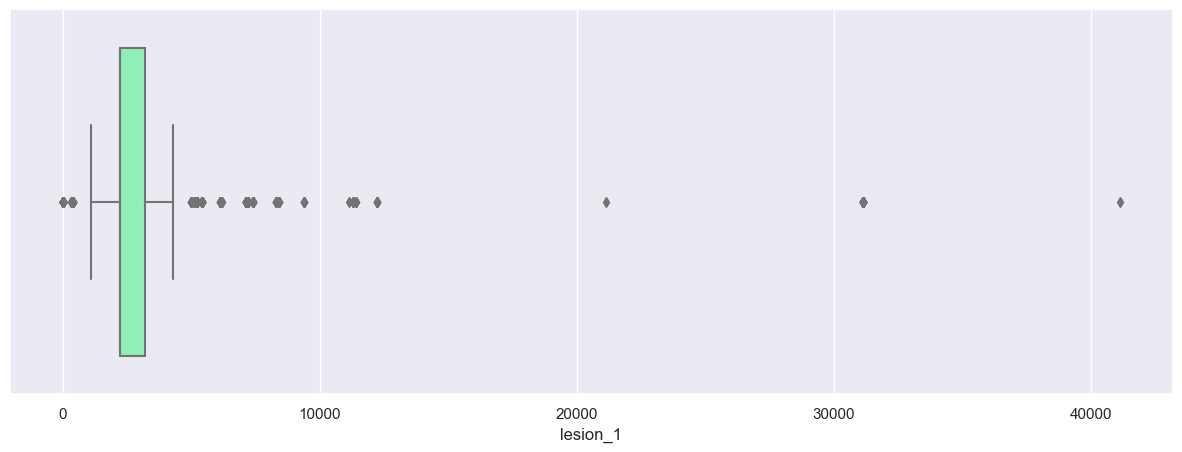

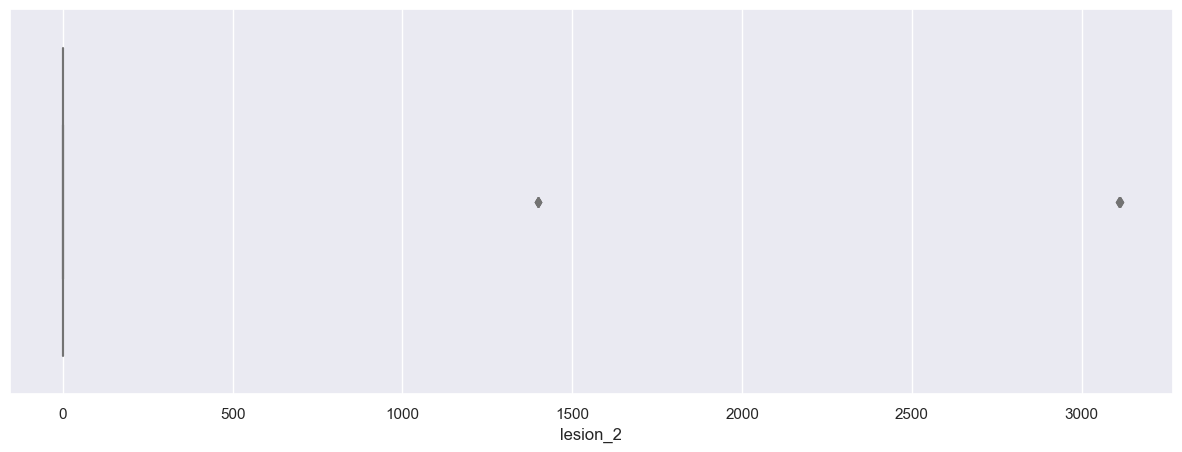

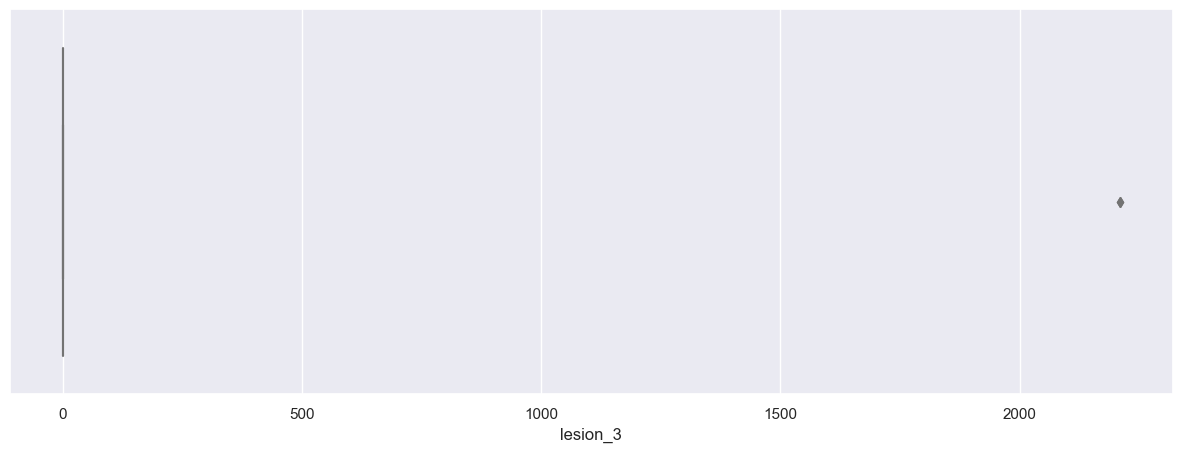

In [41]:
sns.set(rc={'figure.figsize':(15, 5)})
for i in df2.columns:
    
    sns.boxplot(data=df,x=df[i],orient='h',palette='rainbow')
    plt.show()

### Categorical data

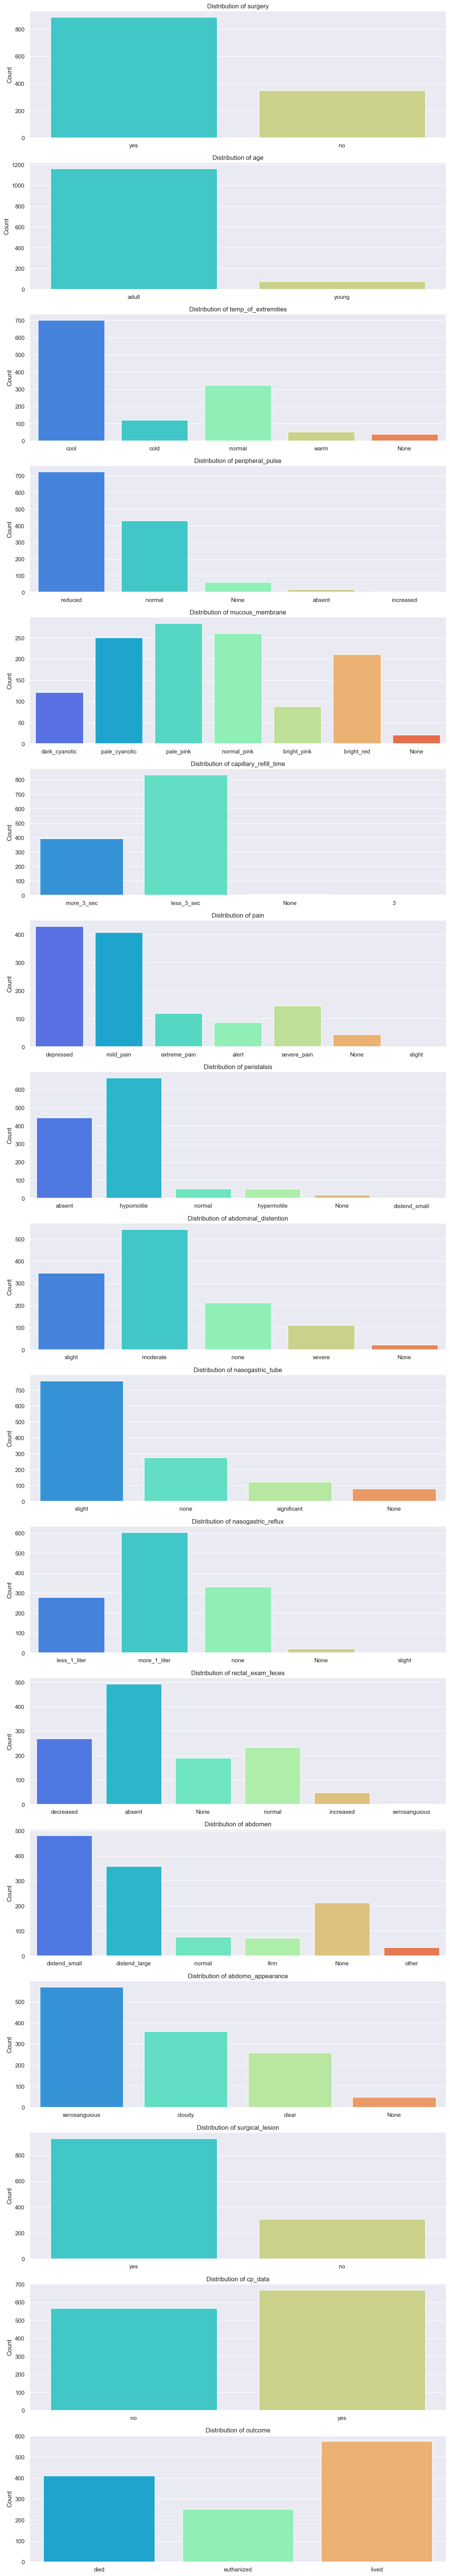

In [40]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Size
plt.figure(figsize=(12, len(categorical_columns) * 4))

# Loop through the categorical columns
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    sns.countplot(data=df, x=col, palette='rainbow')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Target

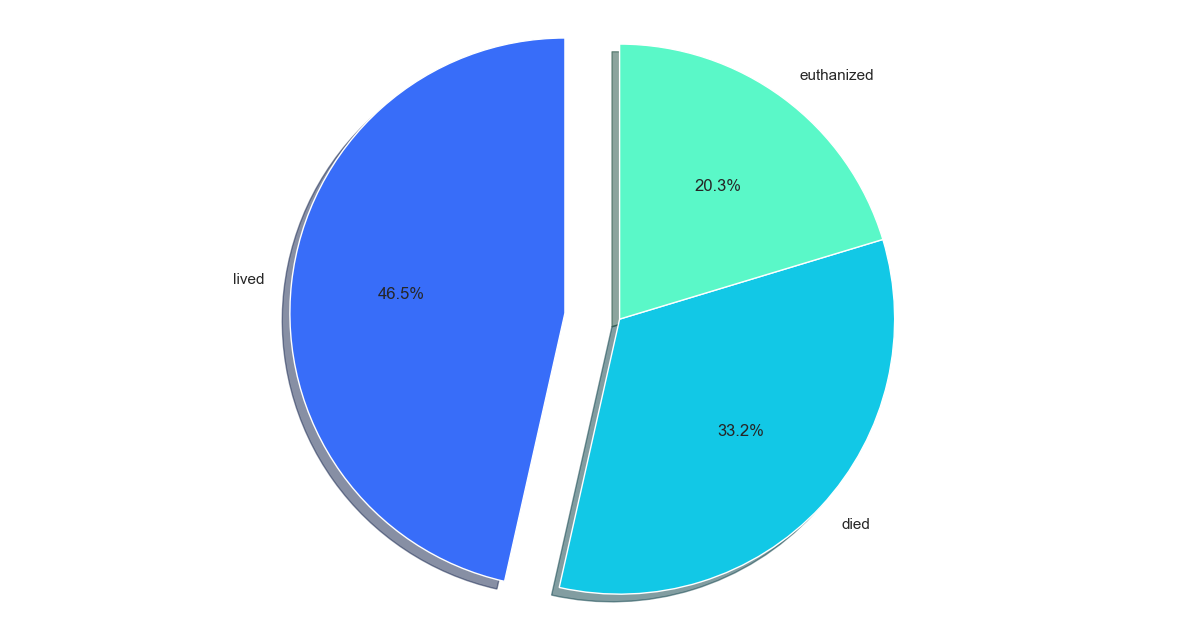

<AxesSubplot:xlabel='outcome', ylabel='count'>

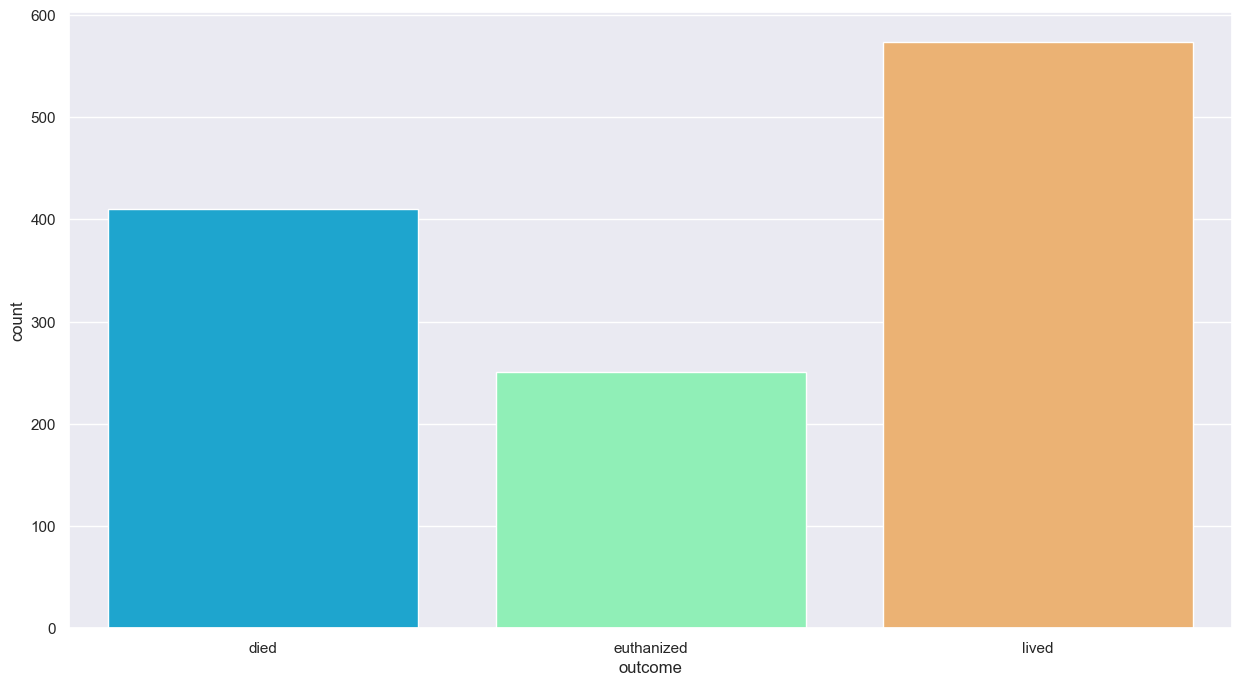

In [42]:
target = 'outcome'
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("rainbow")

labels = df[target].value_counts().index
sizes = df[target].value_counts()
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode= (0.2, 0, 0), labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

sns.set(rc={'figure.figsize':(15, 8)})
sns.countplot(x=target,data=df,palette="rainbow")

### Pairplot and correlation

<Figure size 1000x1000 with 0 Axes>

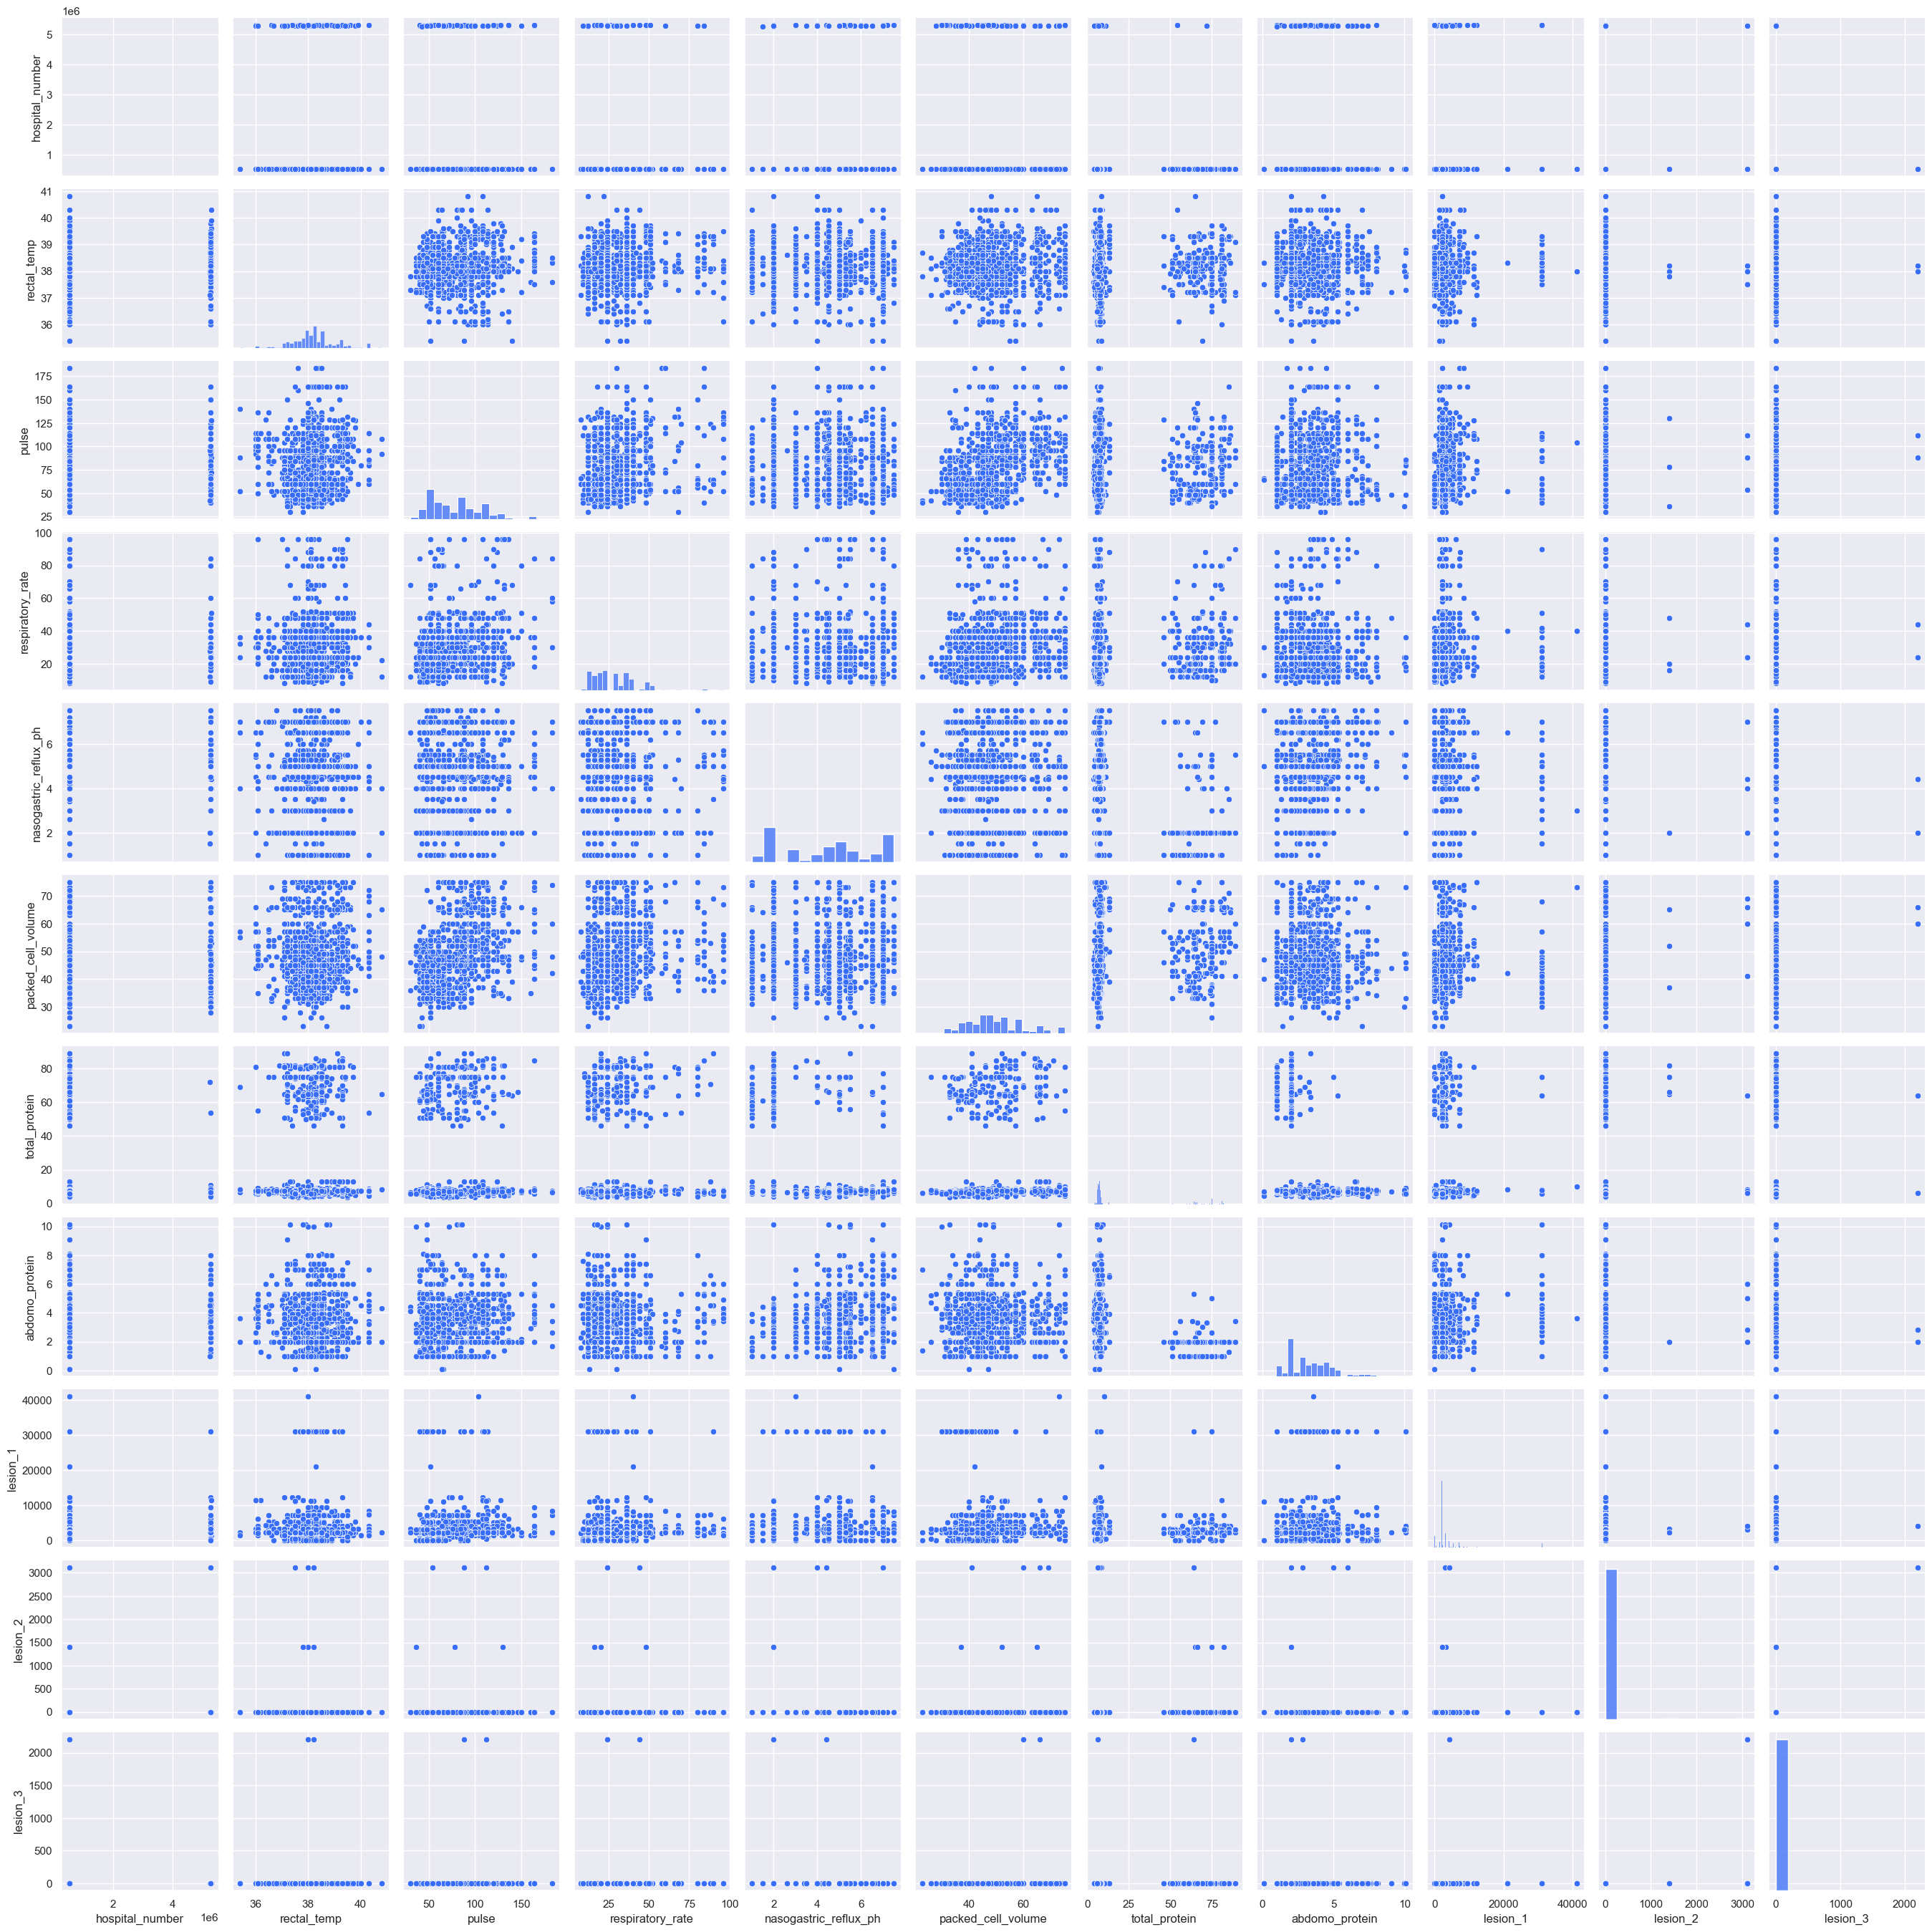

In [26]:
plt.figure(figsize= [10.0, 10.0])
sns.pairplot(data = df2)
plt.show()

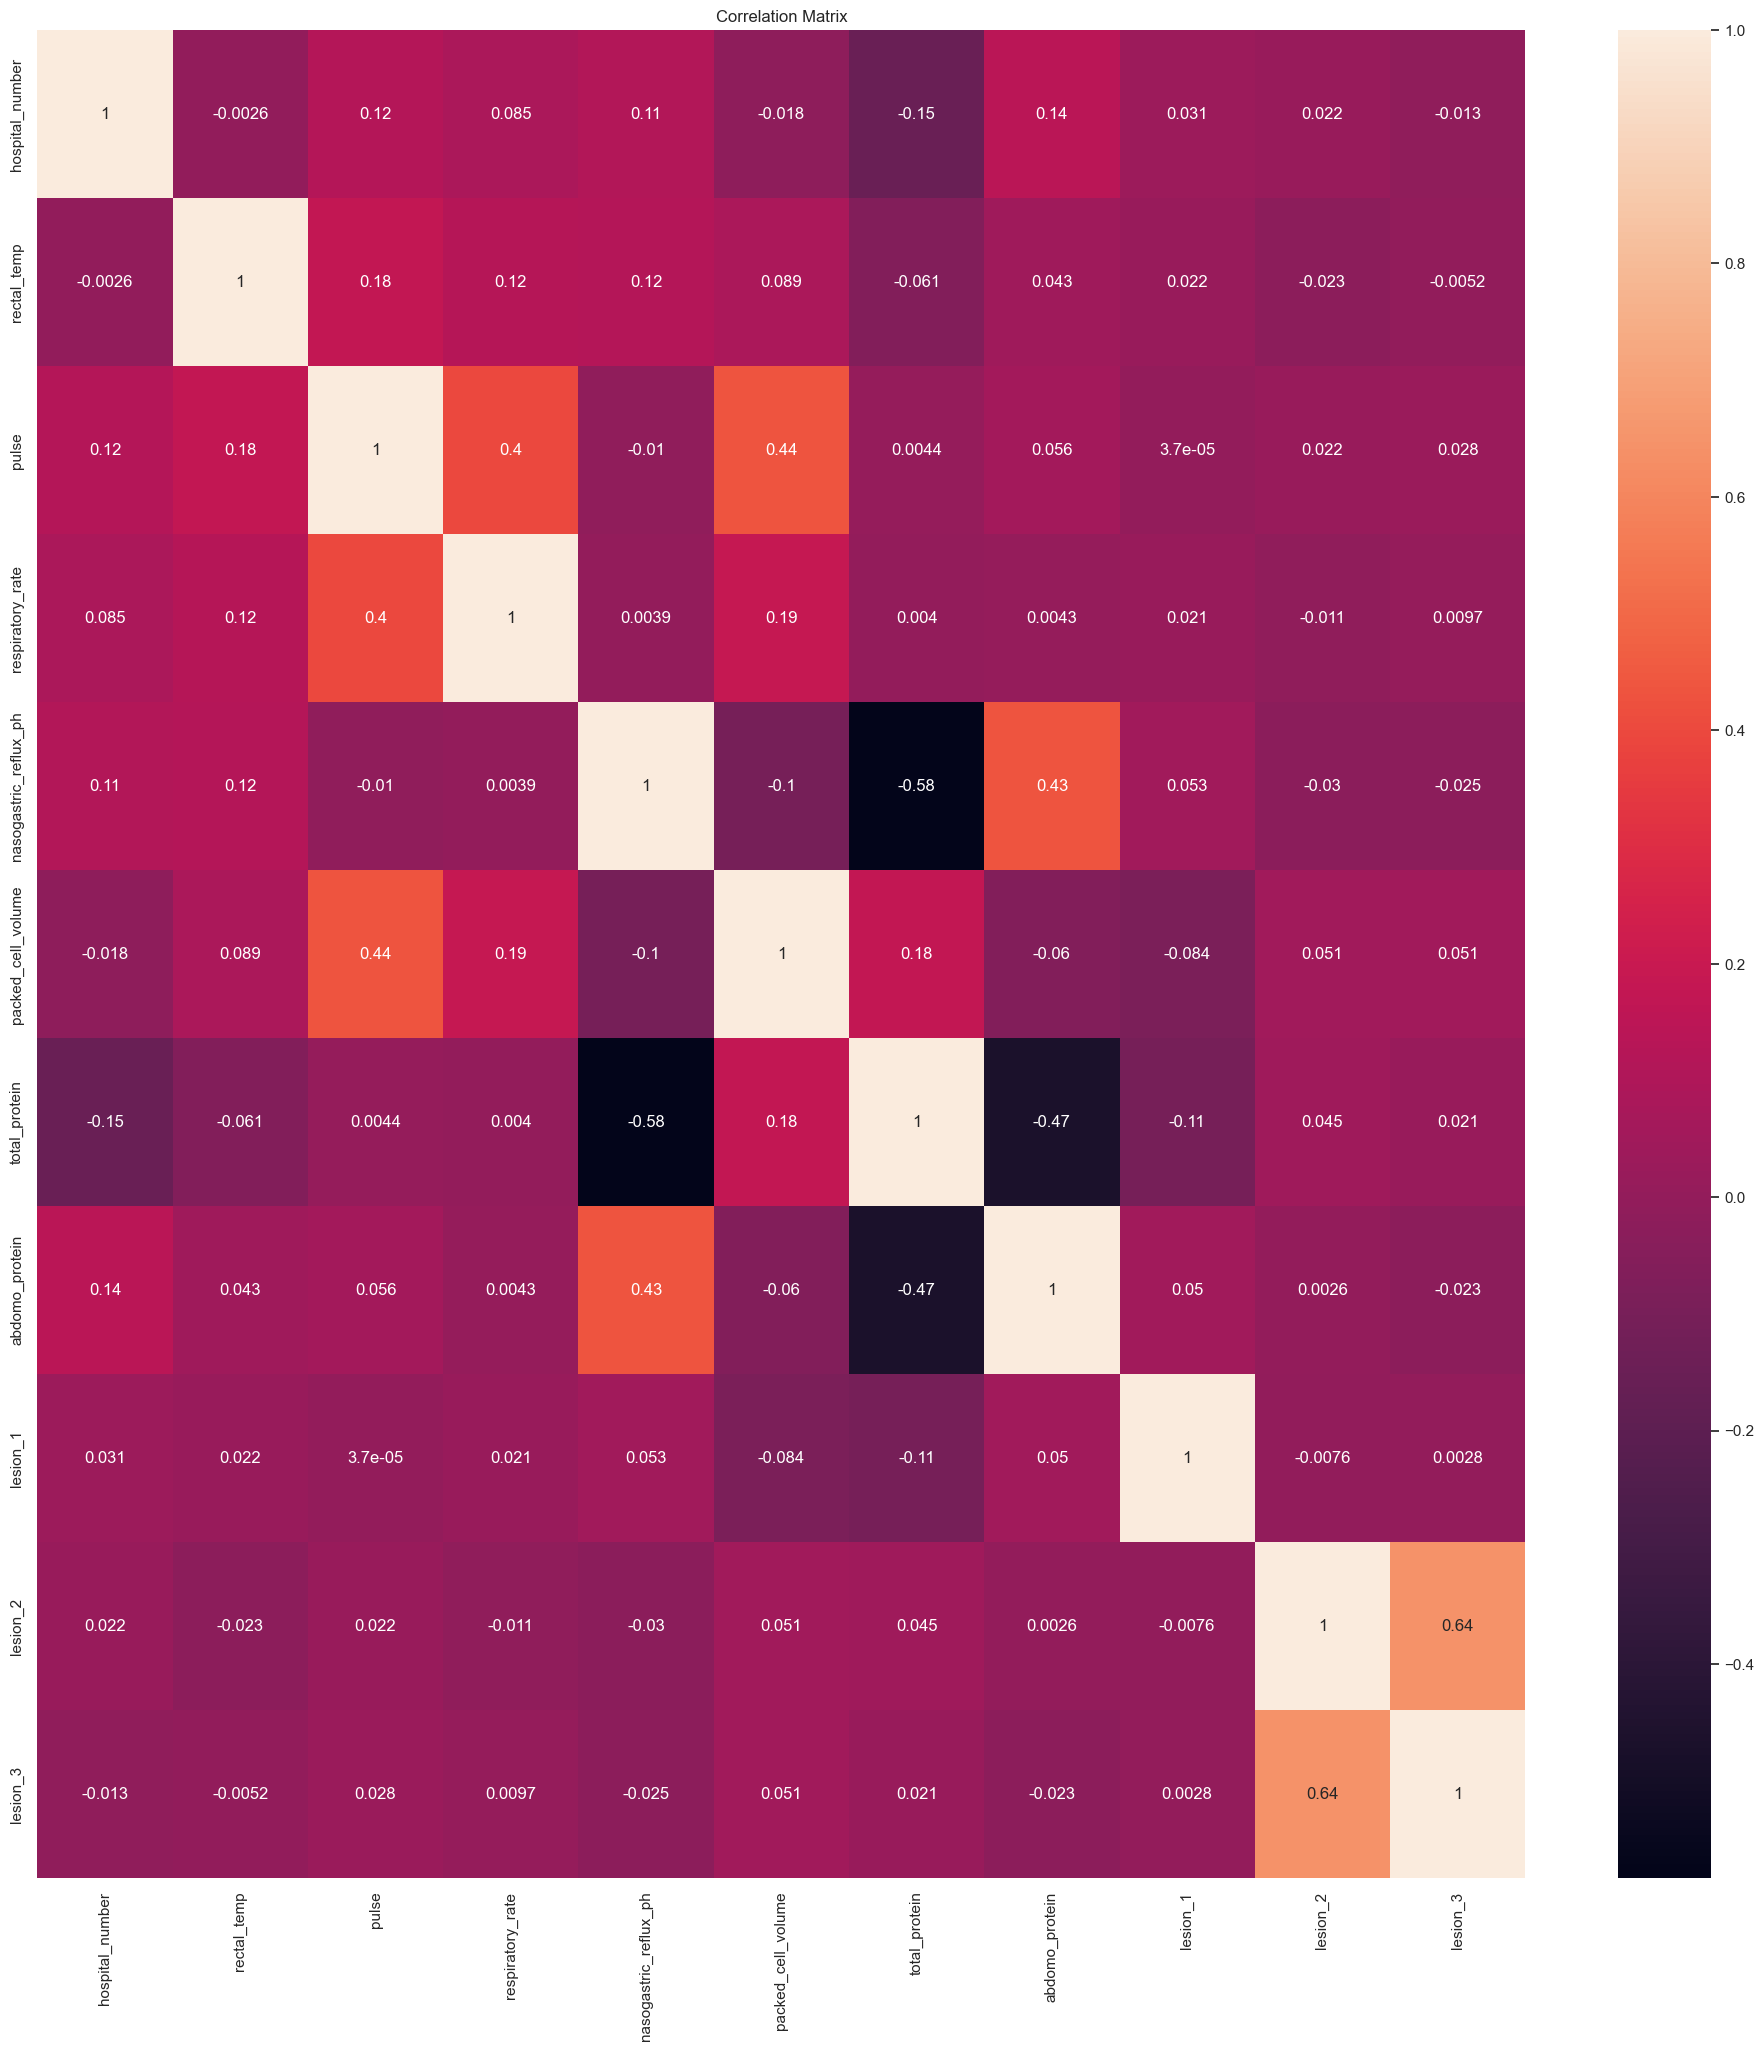

In [46]:
correlations = df2.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True)
plt.title('Correlation Matrix')
plt.show()

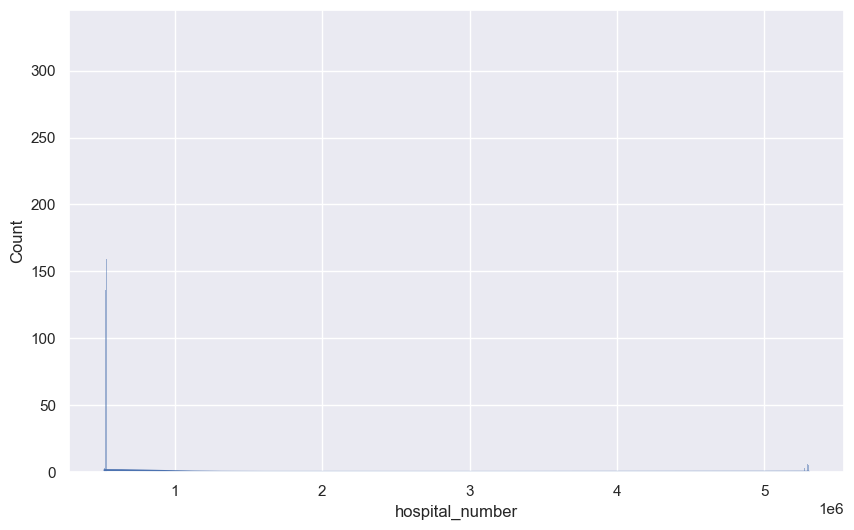

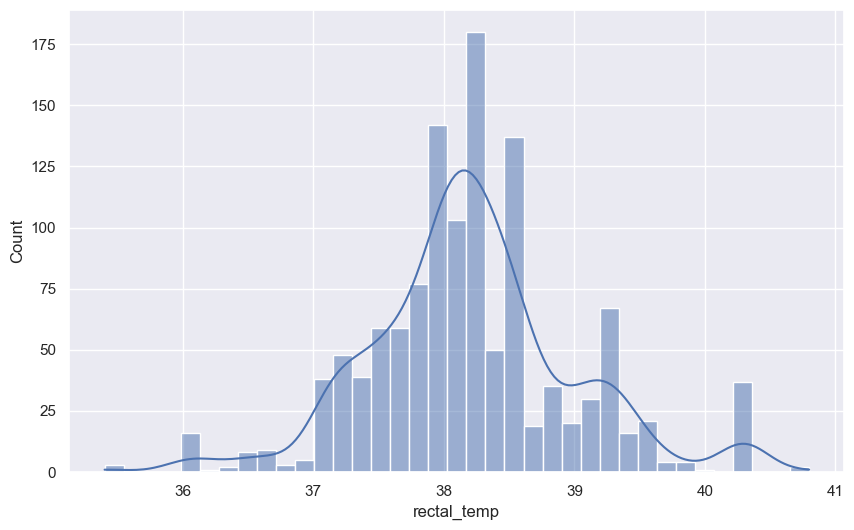

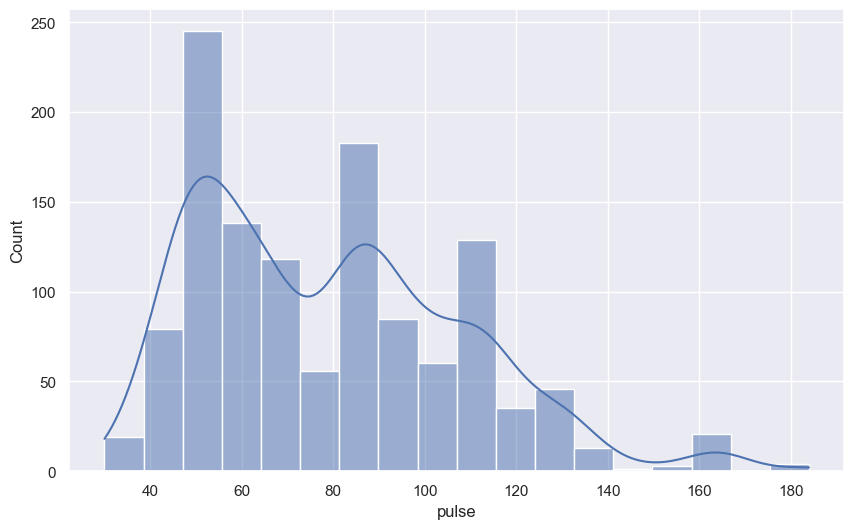

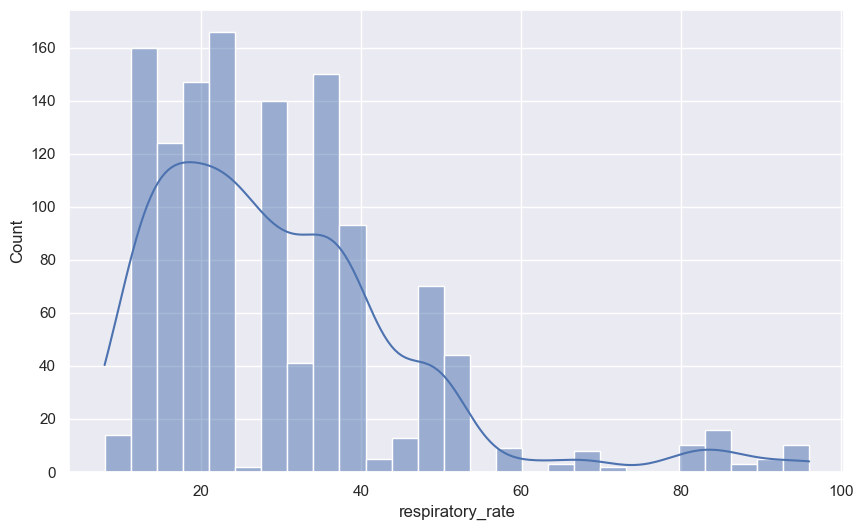

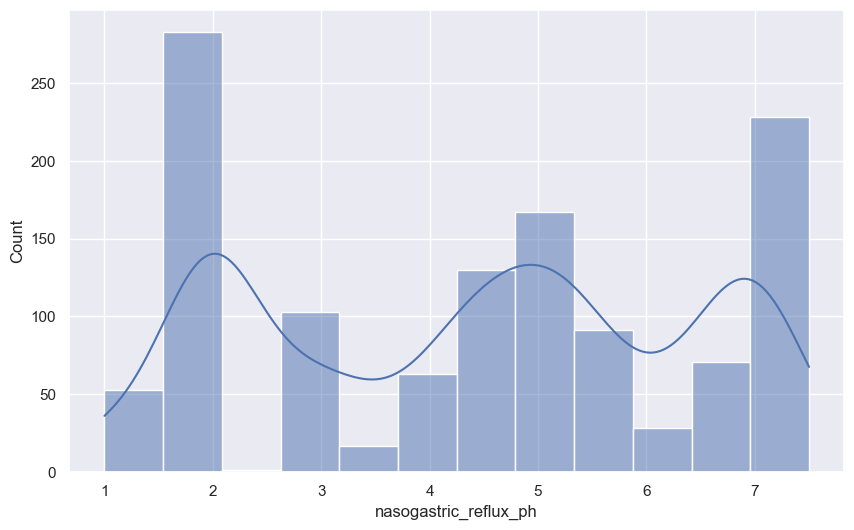

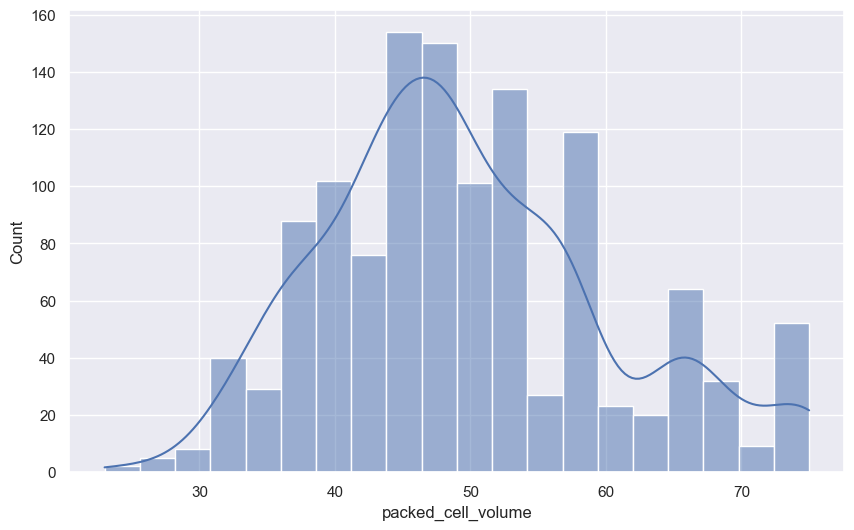

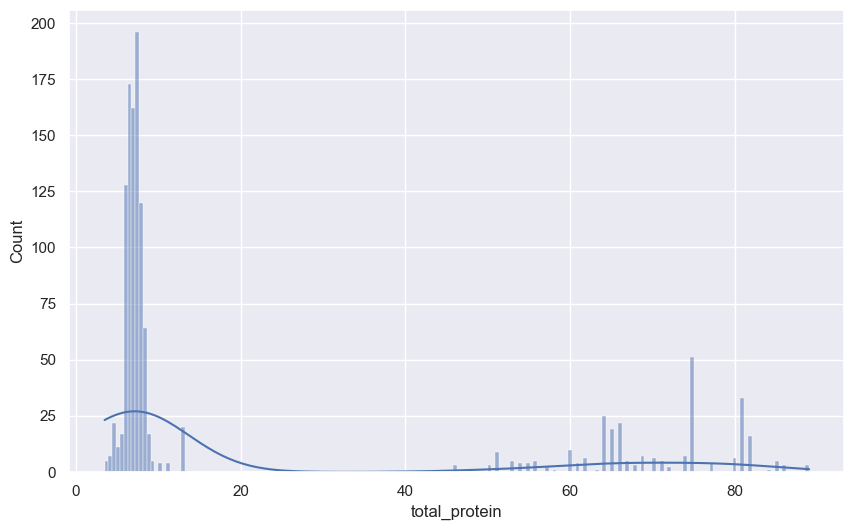

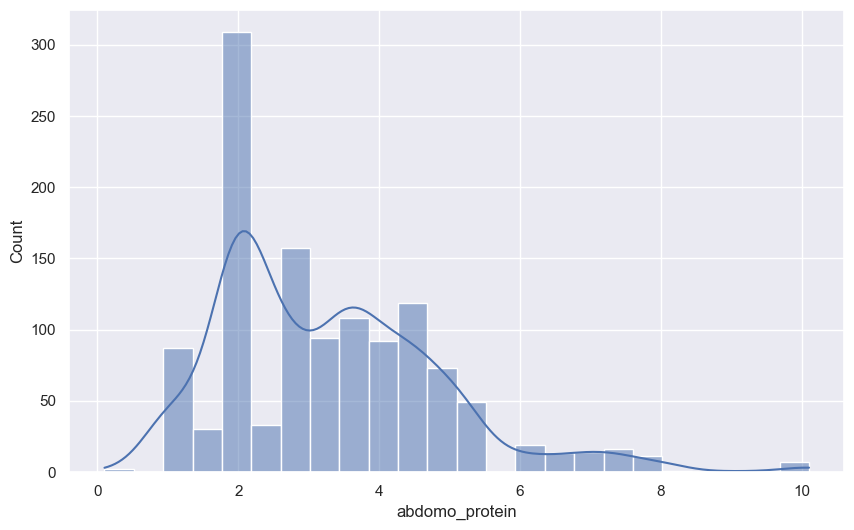

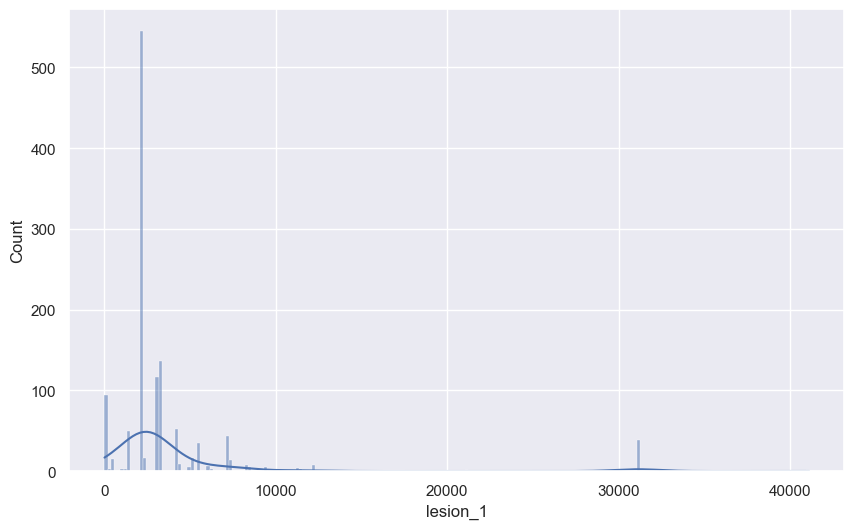

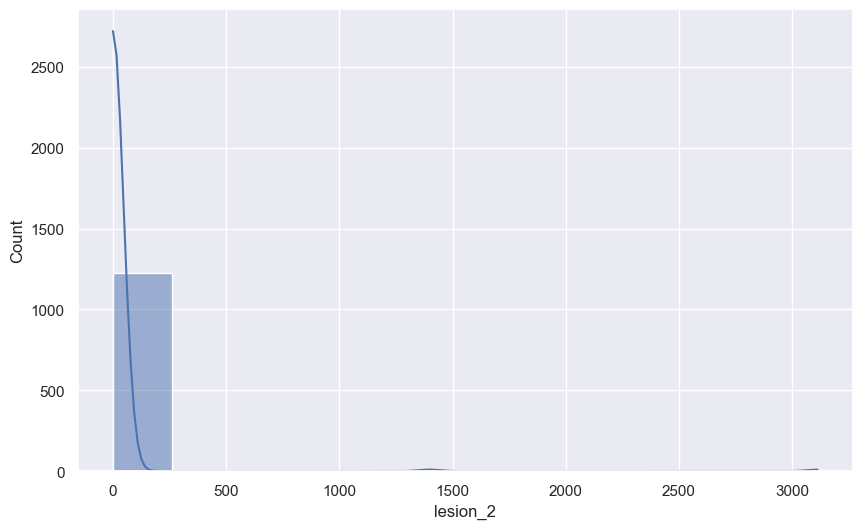

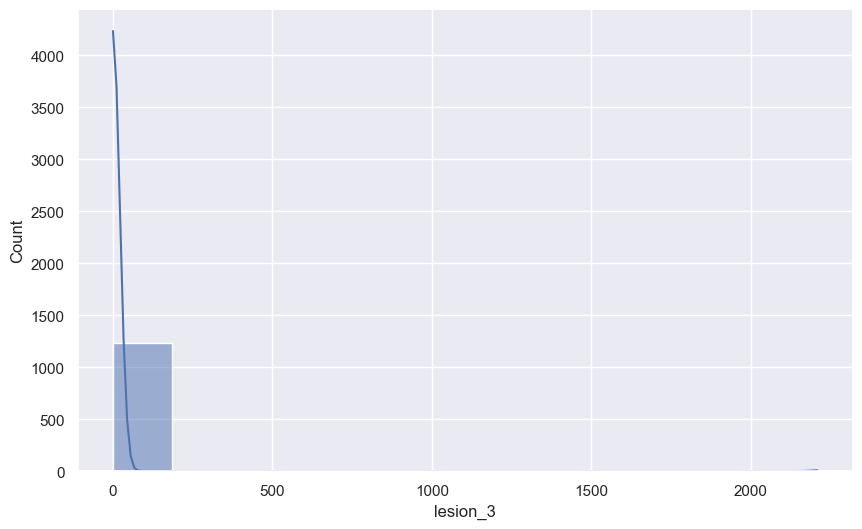

In [38]:
for i in df2.columns:
    plt.figure(figsize= [10.0, 6.0])
    sns.histplot(df[i], kde=True)
    plt.show()